In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads (1).csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
x = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [15]:
base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42)
classifier.fit(x_train,y_train)

C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [16]:
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8875


In [17]:
print(confusion_matrix(y_test,y_pred))

[[50  2]
 [ 7 21]]


<Axes: >

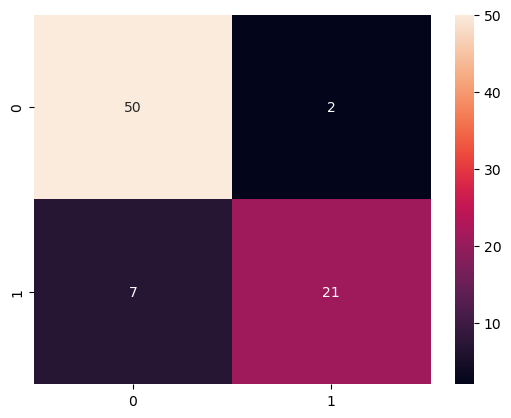

In [19]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42)
classifier.fit(x_train,y_train)
    

GradientBoostingClassifier(random_state=42)

In [22]:
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8625


<Axes: >

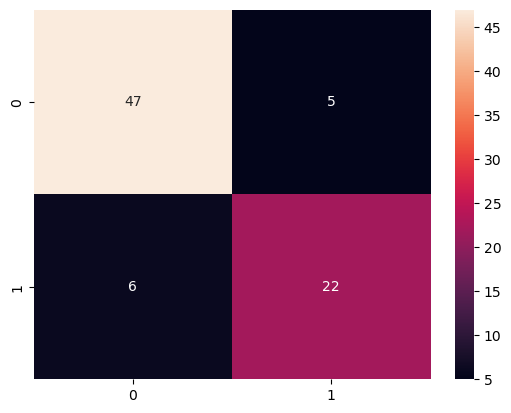

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [33]:
classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    sub_sample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss")
classifier.fit(x_train,y_train)
    

C:\Users\bojja\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
import sys
print(sys.executable)


C:\Users\bojja\anaconda3\python.exe


In [31]:
import sys
!{sys.executable} -m pip install xgboost


  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)


In [34]:
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.9125


<Axes: >

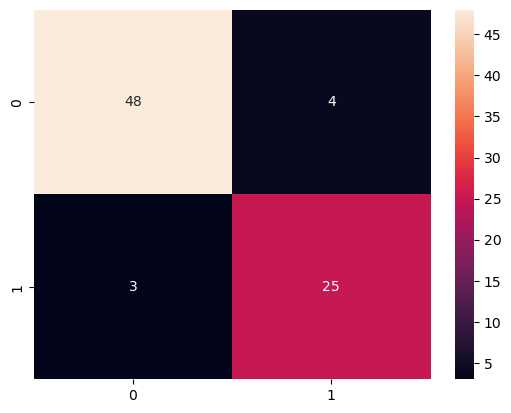

In [35]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [36]:
df = pd.read_csv("Telecom.csv")

In [37]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [41]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [44]:
x = df[["tenure","MonthlyCharges","Contract","PaymentMethod"]]
y = df["Churn"]

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [48]:
classifier = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    sub_sample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss")
classifier.fit(x_train,y_train)
    

C:\Users\bojja\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:03:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "sub_sample", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [49]:
y_pred = classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.801277501774308


<Axes: >

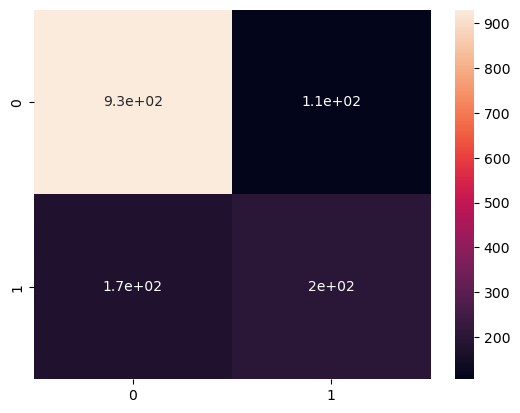

In [50]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [51]:
print(confusion_matrix(y_test,y_pred))

[[930 106]
 [174 199]]
